In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [5]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
import cv2


In [8]:
import os
os.getcwd()

'C:\\workspace\\ml_2'

In [9]:
image = cv2.imread('test.png',cv2.IMREAD_ANYCOLOR)
cv2.imshow("test",image)
cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
img = cv2.imread('digits.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 세로로 50줄, 가로로 100줄로 사진을 나눕니다.
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]
x = np.array(cells)
print(x.shape)
# 각 (20 X 20) 크기의 사진을 한 줄(1 X 400)으로 바꿉니다.
train = x[:, :].reshape(-1, 400).astype(np.float32)
print(train.shape)
# 0이 500개, 1이 500개, ... 로 총 5,000개가 들어가는 (1 x 5000) 배열을 만듭니다.
k = np.arange(10)
train_labels = np.repeat(k, 500)[:, np.newaxis]
print(train_labels.shape)
np.savez("trained.npz", train=train, train_labels=train_labels)

(50, 100, 20, 20)
(5000, 400)
(5000, 1)


In [12]:
FILE_NAME = 'trained.npz'
# 파일로부터 학습 데이터를 불러옵니다.
def load_train_data(file_name):
    with np.load(file_name) as data:
        train = data['train']
        train_labels = data['train_labels']
        return train, train_labels
# 손 글씨 이미지를 (20 x 20) 크기로 Scaling합니다.
def resize20(image):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_resize = cv2.resize(gray, (20, 20))
    plt.imshow(cv2.cvtColor(gray_resize, cv2.COLOR_GRAY2RGB))
    plt.show()
    # 최종적으로는 (1 x 400) 크기로 반환합니다.
    return gray_resize.reshape(-1, 400).astype(np.float32)
def check(test, train, train_labels):
    knn = cv2.ml.KNearest_create()
    knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
    # 가장 가까운 5개의 글자를 찾아, 어떤 숫자에 해당하는지 찾습니다.
    ret, result, neighbours, dist = knn.findNearest(test, k=5)
    return result
train, train_labels = load_train_data(FILE_NAME)
for file_name in glob.glob('./test_*.png'):
    test = resize20(file_name)
    result = check(test, train, train_labels)
    print(result)

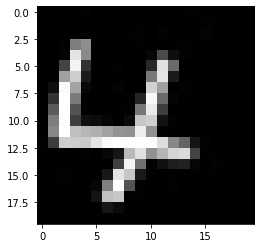

결과 : [[1.]]
Image saved
Clear.


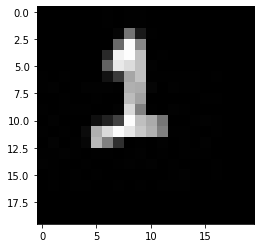

결과 : [[1.]]
Image saved
Clear.


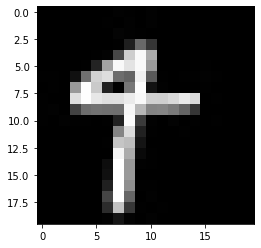

결과 : [[8.]]
Image saved
Clear.


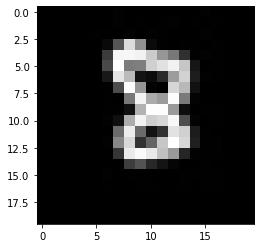

결과 : [[8.]]
Image saved
Clear.


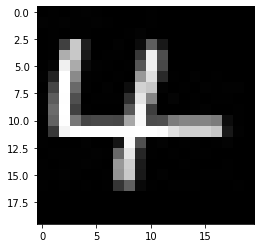

결과 : [[6.]]
Image saved
Clear.


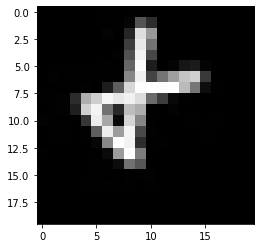

결과 : [[5.]]
Image saved
Good bye


In [20]:
import cv2, os
import numpy as np

img_save_path = "./img/"
if not os.path.exists(img_save_path):
  os.mkdir(img_save_path)

onDown = False
xprev, yprev = None, None
def onmouse(event, x, y, flags, params):
    global onDown, img, xprev, yprev
    if event == cv2.EVENT_LBUTTONDOWN:
        #print("DOWN : {0}, {1}".format(x,y))
        onDown = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if onDown == True:
            # print("MOVE : {0}, {1}".format(x,y))
            cv2.line(img, (xprev,yprev), (x,y), (255,255,255), 20)
    elif event == cv2.EVENT_LBUTTONUP:
        #print("UP : {0}, {1}".format(x,y))
        onDown = False
    xprev, yprev = x,y

cv2.namedWindow("image")
cv2.setMouseCallback("image", onmouse)
width, height = 280, 280
img = np.zeros((280,280,3), np.uint8)
figNum = 1
while True:
    cv2.imshow("image", img)
    key = cv2.waitKey(1)
    if key == ord('r'):
        img = np.zeros((280,280,3), np.uint8)
        print("Clear.")
    if key == ord('s'):
        img_save = cv2.resize(img, dsize=(28,28), interpolation=cv2.INTER_AREA)
        cv2.imwrite("{0}image{1}.jpg".format(img_save_path, str(figNum).zfill(2)), img_save)
        
        test = resize20("{0}image{1}.jpg".format(img_save_path, str(figNum).zfill(2)))
        figNum = figNum + 1
        result = check(test, train, train_labels)
        print("결과 :",result)
        print("Image saved")
    if key == ord('q'):
        print("Good bye")
        break

cv2.destroyAllWindows()